##EDA reference
 https://www.kaggle.com/code/akashdotcom/book-crossing-eda-and-recommendation-model-knn
 https://www.kaggle.com/code/ruchi798/book-crossing-starter-notebook-and-eda/notebook
    
##아래 코드는 프로젝트결과까지 참고할 수 있을 것 같습니다
 https://colab.research.google.com/github/syedsharin/Book-Recommendation-System-Project/blob/main/Book_Recommendation_System_Capstone_Project_4.ipynb#scrollTo=JxKBrL2IIB4Z

# Importing Libraries

In [1]:
pip install pandas-profiling==3.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 6.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.1/303.1 kB 7.9 MB/s eta 0:00:00
  Obtaining dependency information for pydantic>=1.8.1 from https://files.pythonhosted.org/packages/e2/2c/9906b7abc337b0250a5634de5396e2f3cb1b837af0616424c2225a65aa80/pydantic-2.5.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 5.9 MB/s eta 0:00:00
  Obtaining dependency information for PyYAML>=5.0.0 from https://files.pythonhosted.org/packages/7f/5d/2779ea035ba1e533c32ed4a249b4e0448f583ba10830b21a3cddafe11a4e/PyYAML-6.0.1-cp38-cp38-macosx_10_9_x86_64.whl.metadata
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 652.9/652.9 kB 10.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10

In [2]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/5b/69/8378740c6c4bc3a423b717c37e3a56ff86c1763eaf4d209393927437a7e3/wordcloud-1.9.2-cp38-cp38-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.6/159.6 kB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

from PIL import Image as im
from wordcloud import WordCloud,STOPWORDS
from IPython.core.display import Image
# from colorama import Fore, Back, Style
# y_ = Fore.YELLOW
# r_ = Fore.RED
# g_ = Fore.GREEN
# b_ = Fore.BLUE
# m_ = Fore.MAGENTA
# sr_ = Style.RESET_ALL

# Dataset

In [6]:
#Users
u_cols = ['user_id', 'location', 'age']
# users = pd.read_csv('/Users/hakyunglee/Desktop/추천시스템/프로젝트/BX-Users.csv', sep=',', names=u_cols, encoding='latin-1',low_memory=False)
users = pd.read_csv('/Users/joopil/Desktop/이주필/1.DA/0.수업/2023-2/개인화추천시스템/Project/BX-Users.csv', sep=',', names=u_cols, encoding='latin-1',low_memory=False)

#Books
i_cols = ['isbn', 'book_title' ,'book_author','year_of_publication', 'publisher', 'img_s', 'img_m', 'img_l']
# items = pd.read_csv('/Users/hakyunglee/Desktop/추천시스템/프로젝트/BX-Books.csv', sep=',', names=i_cols, encoding='latin-1',low_memory=False)
items = pd.read_csv('/Users/joopil/Desktop/이주필/1.DA/0.수업/2023-2/개인화추천시스템/Project/BX-Books.csv', sep=',', names=i_cols, encoding='latin-1',low_memory=False)

#Ratings
r_cols = ['user_id', 'isbn', 'rating']
# ratings = pd.read_csv('/Users/hakyunglee/Desktop/추천시스템/프로젝트/BX-Book-Ratings.csv', sep=',', names=r_cols, encoding='latin-1',low_memory=False)
ratings = pd.read_csv('/Users/joopil/Desktop/이주필/1.DA/0.수업/2023-2/개인화추천시스템/Project/BX-Book-Ratings.csv', sep=',', names=r_cols, encoding='latin-1',low_memory=False)

In [5]:
users = users.iloc[1:]
items = items.iloc[1:]
ratings = ratings.iloc[1:]
ratings['rating'] = ratings['rating'].astype(int)

In [6]:
#dimension of dataset
print(f'''\t  Book_df shape is {items.shape}
          Ratings_df shape is {ratings.shape}
          Users_df shape is {users.shape}''')

	  Book_df shape is (44365, 8)
          Ratings_df shape is (100726, 3)
          Users_df shape is (5157, 3)


# Users dataset

In [7]:
users.head()

,user_id,location,age
1,183,"porto, porto, portugal",27.0
2,242,"neuffen, baden-wuerttemberg, germany",37.0
3,254,"minneapolis, minnesota, usa",24.0
4,388,"nashville, tennessee, usa",35.0
5,392,"barcelona, catalunya, spain",44.0


In [8]:
users.describe()

,user_id,location,age
count,5157,5157,5157
unique,5157,2749,98
top,183,"toronto, ontario, canada",26.0
freq,1,48,211


In [9]:
print(f"{y_}{users.dtypes}\n") 

user_id     object
location    object
age         object
dtype: object



In [10]:
def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [11]:
missing_values(users)

,index,Missing Values,% of Total Values,Data_type
0,user_id,0,0.0,object
1,location,0,0.0,object
2,age,0,0.0,object


Users 데이터의 경우, 결측치 없는 것으로 확인됨
1. Age 분포 확인

In [21]:
users['age'].describe()

count     5157
unique      98
top       26.0
freq       211
Name: age, dtype: object

In [23]:
users['age'] = users['age'].astype(float)
users['user_id'] = users['user_id'].astype(int)
ratings['user_id'] = ratings['user_id'].astype(int)
ratings['rating'] = ratings['rating'].astype(int)
items['year_of_publication'] = items['year_of_publication'].astype(int)

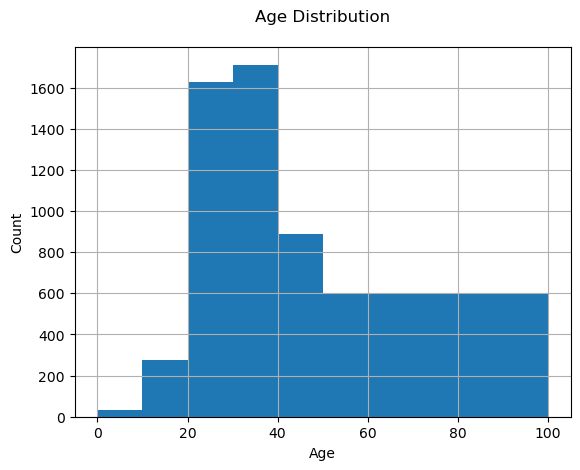

In [24]:
users.age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

가장 활발한 사용자는 2-30대임으로 확인된다 (The most active users are among those in their 20–30s.)

이상치도 확인해보면

Text(0.5, 1.0, 'Find outlier data in Age column')

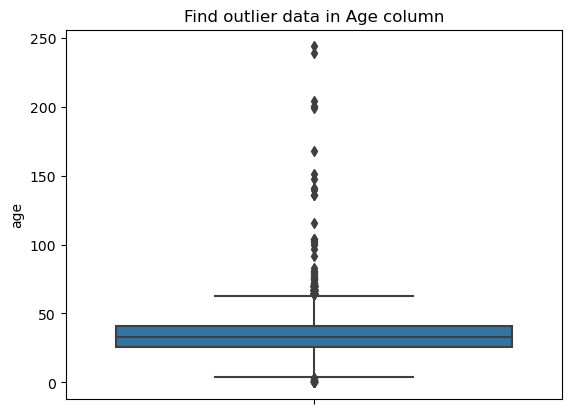

In [26]:
sns.boxplot(y='age', data=users)
plt.title('Find outlier data in Age column')

In [27]:
print(sorted(users.age.unique()))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 74.0, 75.0, 76.0, 77.0, 79.0, 80.0, 81.0, 83.0, 92.0, 97.0, 100.0, 101.0, 103.0, 104.0, 116.0, 136.0, 140.0, 141.0, 148.0, 151.0, 168.0, 199.0, 201.0, 204.0, 239.0, 244.0]


In [30]:
invalid_age_count = users.loc[(users.age > 99) | (users.age < 5), 'age'].count()
invalid_age_count

39

0~5살, 100살 이상은 이상치로 봐야하나? 150살 이상은 확실히 이상치

In [37]:
#import numpy as np
#age 열의 값이 99 초과 또는 5 미만인 행에 대해서 열의 평균값으로 대체
#users.loc[(users.age>99) | (users.age<5),'age'] = np.nan
#users.age = users.age.fillna(users.age.mean())

2. location 

In [31]:
users.location.unique()

array(['porto, porto, portugal', 'neuffen, baden-wuerttemberg, germany',
       'minneapolis, minnesota, usa', ..., 'lake george, new york, usa',
       'lakeland, tennessee, usa', 'pismo beach, california, usa'],
      dtype=object)

In [32]:
users.location.nunique()

2749

# Books dataset

In [12]:
items.head(5)

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
1,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...
2,1551103982,The Cycling Adventures of Coconut Head: A Nort...,Ted Schredd,1900,Graphic Arts Center Pub Co,http://images.amazon.com/images/P/1551103982.0...,http://images.amazon.com/images/P/1551103982.0...,http://images.amazon.com/images/P/1551103982.0...
3,013022393X,All the Best Salads and Salad Dressings,J. Warner,1911,Prentice Hall Direct,http://images.amazon.com/images/P/013022393X.0...,http://images.amazon.com/images/P/013022393X.0...,http://images.amazon.com/images/P/013022393X.0...
4,030758013X,Assorted Small Tray Puzzles,Golden,1920,Golden Books,http://images.amazon.com/images/P/030758013X.0...,http://images.amazon.com/images/P/030758013X.0...,http://images.amazon.com/images/P/030758013X.0...
5,082493069X,Grill and Barbecue Cooking,Ideals Publications Inc,1920,Ideals Publications,http://images.amazon.com/images/P/082493069X.0...,http://images.amazon.com/images/P/082493069X.0...,http://images.amazon.com/images/P/082493069X.0...


In [13]:
items.describe()

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
count,44365,44365,44364,44365,44365,44357,44362,44361
unique,44133,42868,25820,80,6593,44114,44130,44129
top,038072118X,Ranma 1/2 (Ranma 1/2),Stephen King,2002,Goldmann,"Co. KG, Verlag",http://images.amazon.com/images/P/038531695X.0...,http://images.amazon.com/images/P/038072118X.0...
freq,2,7,143,4272,760,6,2,2


In [14]:
print(f"{y_}{items.dtypes}\n") 

isbn                   object
book_title             object
book_author            object
year_of_publication    object
publisher              object
img_s                  object
img_m                  object
img_l                  object
dtype: object



In [33]:
items.isnull().sum()

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              0
img_s                  8
img_m                  3
img_l                  4
dtype: int64

In [34]:
items.loc[items.book_author.isnull(),:]

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
15433,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [35]:
items.loc[items.isbn=='9627982032','book_author']='Larissa Anne Downe' #결측치 처리

In [36]:
items.isnull().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
img_s                  8
img_m                  3
img_l                  4
dtype: int64

In [39]:
items['year_of_publication'].describe()

count    44365.000000
mean      1996.015327
std          7.618767
min       1378.000000
25%       1993.000000
50%       1998.000000
75%       2001.000000
max       2026.000000
Name: year_of_publication, dtype: float64

In [40]:
print(sorted(items.year_of_publication.unique()))

[1378, 1900, 1911, 1920, 1921, 1923, 1926, 1928, 1929, 1930, 1931, 1936, 1940, 1941, 1942, 1943, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2020, 2026]


The value 0 for Year-Of_Publication is invalid and as this dataset was published in 2004,
We have assumed that the years after 2006 to be invalid 
2006년 이후 => 이상치

In [64]:
#items.loc[(items.year_of_publication==0)|(items.year_of_publication>2006) ,'year_of_publication' ] = np.nan
#items.year_of_publication = items.year_of_publication.fillna(round(items.year_of_publication.mean()))


# ratings dataset

In [15]:
ratings.head(5)

,user_id,isbn,rating
1,276762,3404122879,0
2,276762,3404182928,0
3,276762,3426690179,0
4,276762,3442424216,0
5,276762,3442425573,0


In [16]:
ratings.describe()

,rating
count,100726.000000
mean,2.729534
std,3.854310
min,0.000000
25%,0.000000
50%,0.000000
75%,7.000000
max,10.000000


In [17]:
print(f"{y_}{ratings.dtypes}\n") 

user_id    object
isbn       object
rating      int64
dtype: object



# 데이터를 같이 봐보자

In [11]:
df = pd.merge(users, ratings, on='user_id')
df = pd.merge(df, items, on='isbn')
df.head(5)

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1,183,"porto, porto, portugal",27.0,8401422825,9,Fahrenheit 451,Ray Bradbury,1993,"Plaza &amp Janes Editores, S.A.",http://images.amazon.com/images/P/8401422825.0...,http://images.amazon.com/images/P/8401422825.0...,http://images.amazon.com/images/P/8401422825.0...
2,183,"porto, porto, portugal",27.0,8420639133,0,Temor y Temblor,Soren Kierkegaard,2001,Alianza,http://images.amazon.com/images/P/8420639133.0...,http://images.amazon.com/images/P/8420639133.0...,http://images.amazon.com/images/P/8420639133.0...
3,183,"porto, porto, portugal",27.0,8433920081,0,El Almuerzo Desnudo,William S. Burroughs,1995,Anagrama,http://images.amazon.com/images/P/8433920081.0...,http://images.amazon.com/images/P/8433920081.0...,http://images.amazon.com/images/P/8433920081.0...
4,49144,"ferreries, illes balears, spain",43.0,8433920081,5,El Almuerzo Desnudo,William S. Burroughs,1995,Anagrama,http://images.amazon.com/images/P/8433920081.0...,http://images.amazon.com/images/P/8433920081.0...,http://images.amazon.com/images/P/8433920081.0...


In [43]:
missing_values(df)

,index,Missing Values,% of Total Values,Data_type
0,img_s,11,0.01,object
1,img_m,6,0.01,object
2,img_l,7,0.01,object
3,user_id,0,0.00,int64
4,location,0,0.00,object
5,age,0,0.00,float64
6,isbn,0,0.00,object
7,rating,0,0.00,int64
8,book_title,0,0.00,object
9,book_author,0,0.00,object


In [44]:
df.shape

(106800, 12)

In [45]:
#splitting location column into newer columns
location = df.location.str.split(', ', n=2, expand=True)
location.columns=['city', 'state', 'country']

df['city'] = location['city']
df['state'] = location['state']
df['country'] = location['country']

In [104]:
df['country']=df['country'].astype('str')

In [107]:
a=list(df.country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['None', 'andorra', 'argentina', 'australia', 'austria', 'belgium', 'brazil', 'british columbia, canada', 'bulgaria', 'burma', 'cambridgeshire, united kingdom', 'canada', 'canary islands, spain', 'catalonia', 'catalunya', 'catalunya, spain', 'chile', 'china', 'costa rica', 'czech republic', 'denmark', 'disrito federal, mexico', 'dominican republic', 'england', 'england, united kingdom', 'euskal herria', 'far away...', 'finland', 'france', 'galiza', 'germany', 'guatemala', 'here and there', 'hong kong', 'hungary', 'illinois, usa', 'india', 'iran', 'ireland', 'italy', 'japan', 'kuwait', 'luxembourg', 'madagascar', 'malaysia', 'mexico', 'netherlands', 'new york, georgia, usa', 'new york, usa', 'new zealand', 'norway', 'oregon, usa', 'orense', 'panama', 'papua new guinea', 'philippines', 'phillipines', 'poland', 'portugal', 'qatar', 'romania', 'singapore', 'south africa', 'spain', 'sweden', 'switzerland', 'taiwan', 'trinidad and tobago', 'turkey', 'u.s.a.', 'united kingdom', 'united state'

In [46]:
df = df.drop(['location','img_s','img_m','img_l'], axis = 1)

In [47]:
df.dtypes

user_id                  int64
age                    float64
isbn                    object
rating                   int64
book_title              object
book_author             object
year_of_publication      int64
publisher               object
city                    object
state                   object
country                 object
dtype: object

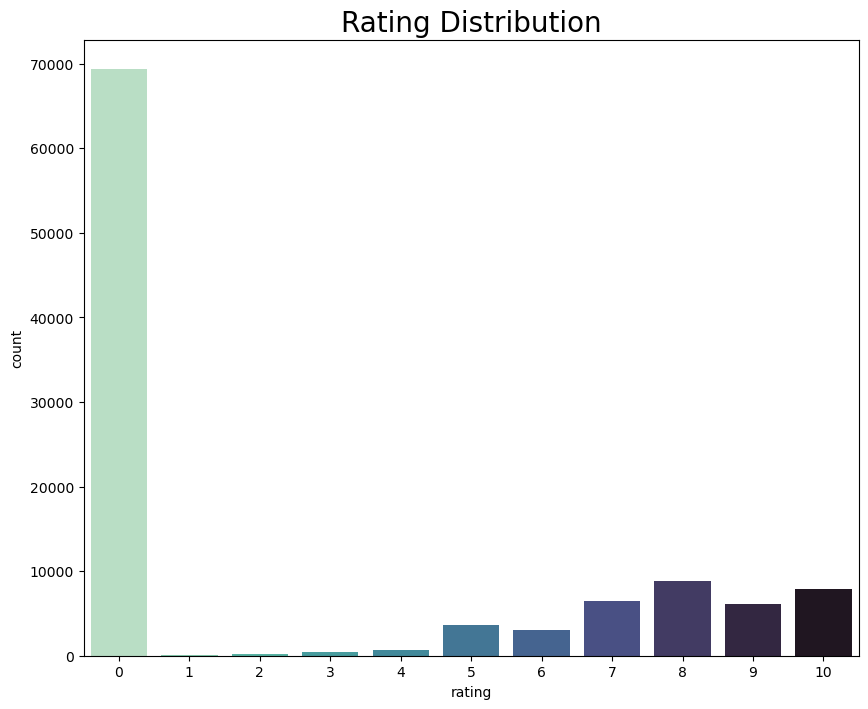

In [49]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',data=df,palette='mako_r')
plt.title('Rating Distribution',size=20)
plt.show()

In [50]:
df['rating'].value_counts()

0     69369
8      8780
10     7885
7      6422
9      6095
5      3688
6      3001
4       734
3       473
2       214
1       139
Name: rating, dtype: int64

Analzing the rating distribution and the value counts of the ratings column in the dataframe, 
we notice the that the number of implicit ratings are significantly high
평가는 매우 고르지 않게 분포되어 있으며 대부분의 평가는 0입니다. //
데이터 세트 설명에 인용된 대로 BX-Book-Ratings에는 도서 평가 정보가 포함되어 있습니다. //
평가는 1부터 10까지의 척도로 표시되어 높은 평가를 나타내는 명시적 평가이거나 0으로 표시되는 암시적 평가입니다. //
따라서 암시적 평가와 명시적 평가 데이터 집합을 구분합니다.

0점 rating (implicit rating)이 전체 rating데이터의 대부분을 차지.
1점 이상의 explicit rating들만 따로 확인해보자

In [78]:
ratings_explicit = df[df['rating'] != 0]

In [80]:
len(ratings_explicit)

37431

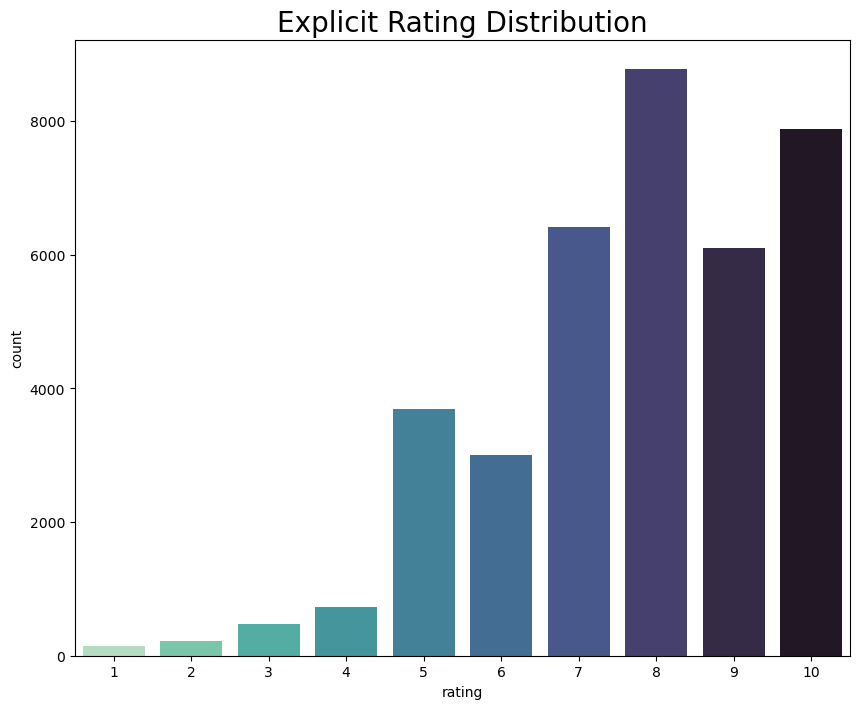

In [66]:
df_v=df[['rating']].copy()
df_v.dtypes
df_v = df_v[df_v.rating != 0]
plt.figure(figsize=(10,8))
sns.countplot(x='rating',data=df_v,palette='mako_r')
plt.title('Explicit Rating Distribution',size=20)
plt.show()

사용자들 사이에서 높은 평점이 더 흔하다는 것을 관찰할 수 있습니다. 
평점 8이 가장 많은 횟수로 평가되었습니다.
It can be observe that higher ratings are more common amongst users 
and rating 8 has been rated highest number of times

/var/folders/wt/y14cmpv94wx58gfyv_67fxn40000gn/T/ipykernel_44394/1615941142.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'],kde=False)


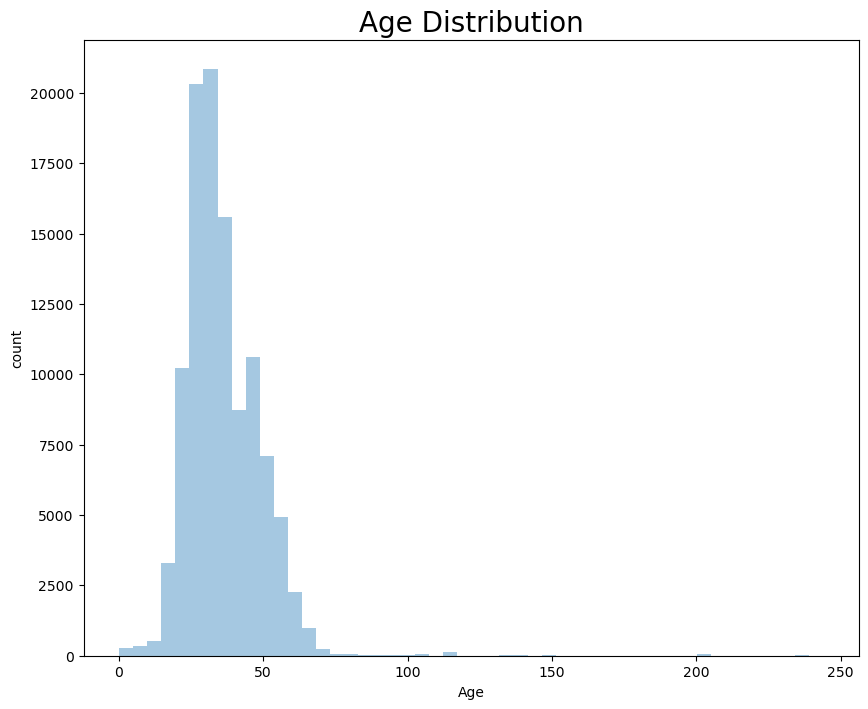

In [52]:
plt.figure(figsize=(10,8))
sns.distplot(df['age'],kde=False)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age Distribution',size=20)
plt.show()

Top 25 Years of Publication

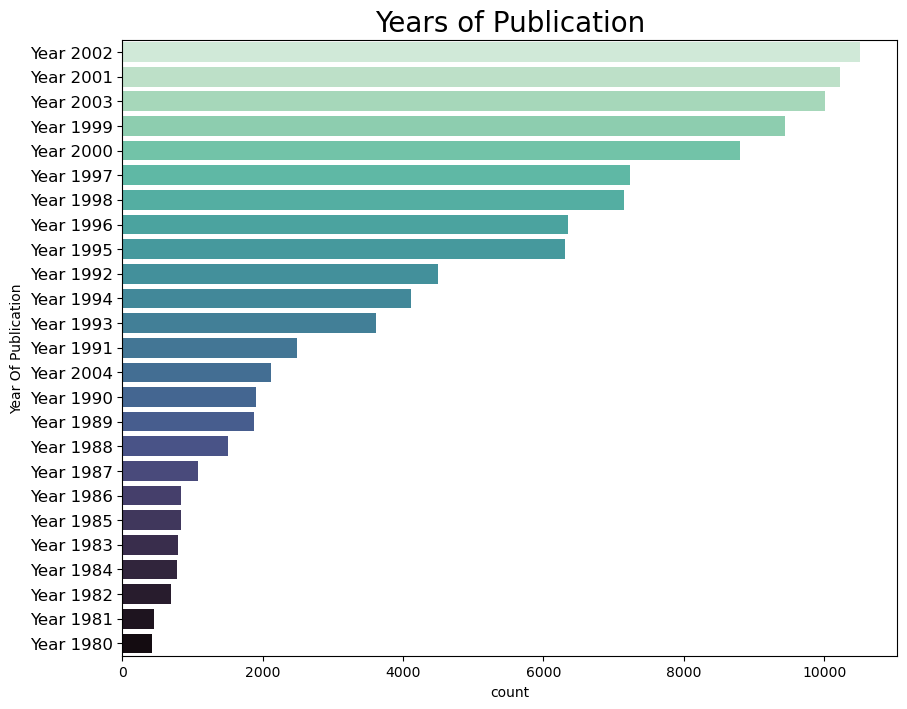

In [53]:
df_v=df[['year_of_publication']].copy()
df_v['year_of_publication'] = df_v['year_of_publication'].astype(int).astype(str)
df_v=df_v['year_of_publication'].value_counts().head(25).reset_index()
df_v.columns=['year','count']
df_v['year']='Year '+df_v['year']

plt.figure(figsize=(10,8))
sns.barplot(x='count',y='year',data=df_v,palette='mako_r')
plt.ylabel('Year Of Publication')
plt.yticks(size=12)
plt.title('Years of Publication',size=20)
plt.show()

In [57]:
def barplot(df,col,l):
    df_v=df[col].value_counts().head(25).reset_index()
    df_v.columns=[col,'count']

    plt.figure(figsize=(10,12))
    sns.barplot(x='count',y=col,data=df_v,palette='mako_r')
    plt.ylabel(l)
    plt.title(l,size=20)
    plt.show()

Top 25 Books

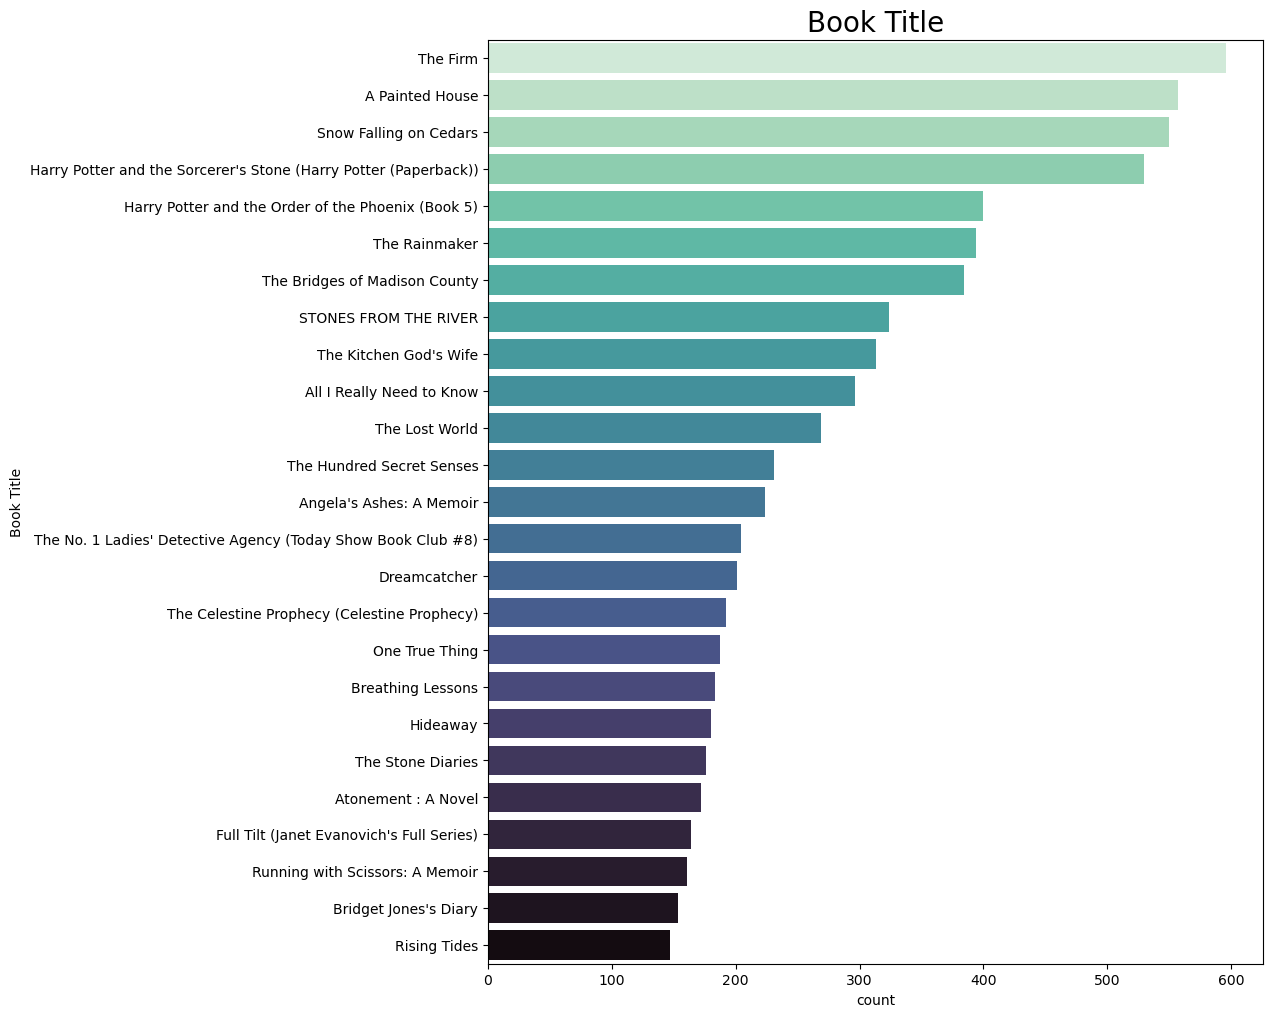

In [58]:
barplot(df,'book_title','Book Title')

Word cloud of book titles

In [9]:
def color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(188)
    s = int(100.0 * 255 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 160)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

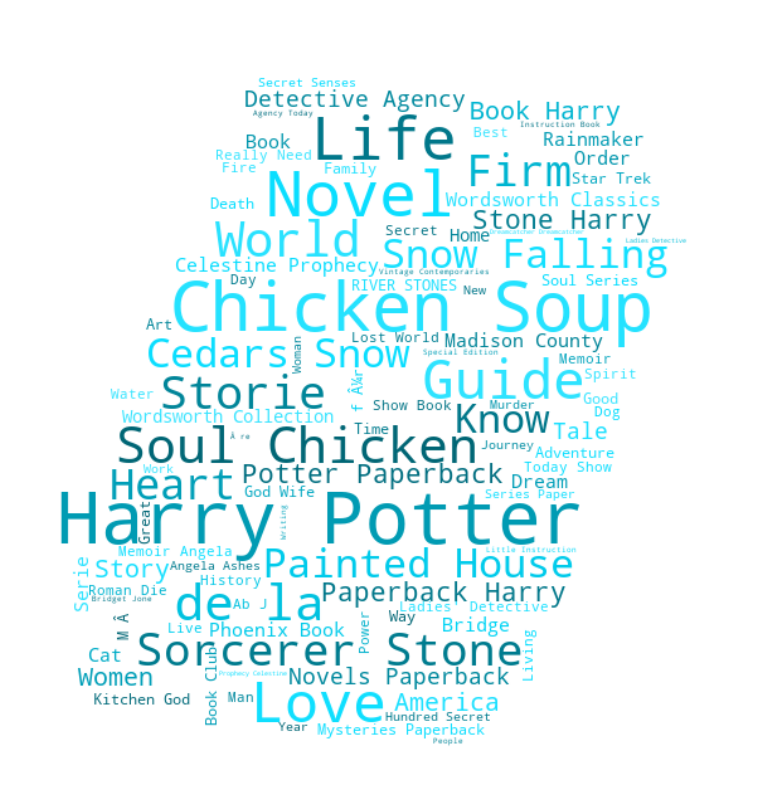

In [28]:
from PIL import Image
plt.subplots(figsize=(10,10))
book_mask = np.array(Image.open("bookds.jpeg"))  
wc = WordCloud(background_color="white", mask = book_mask,
               max_words=100,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500,color_func=color_func)
wc.generate(' '.join(df['book_title']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

Top 25 Authors

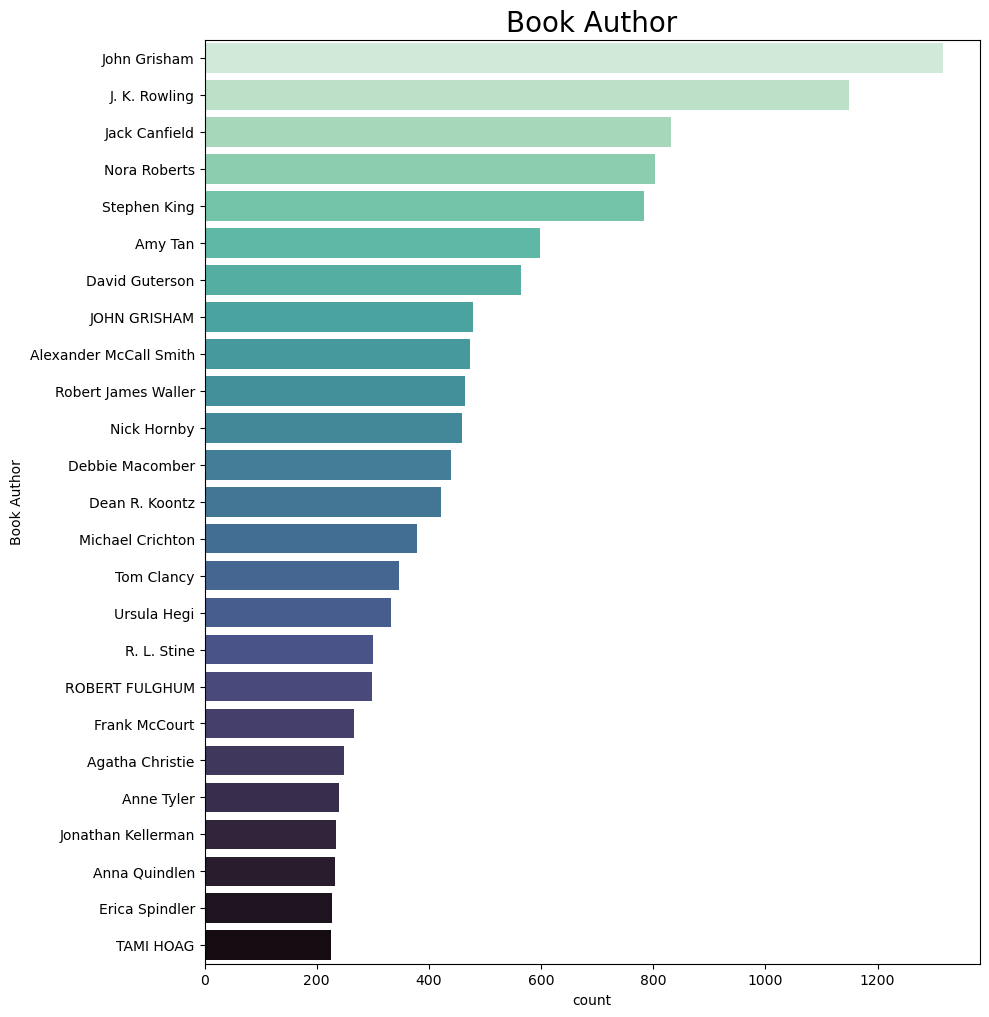

In [59]:
barplot(df,'book_author','Book Author')

Top 25 publishers

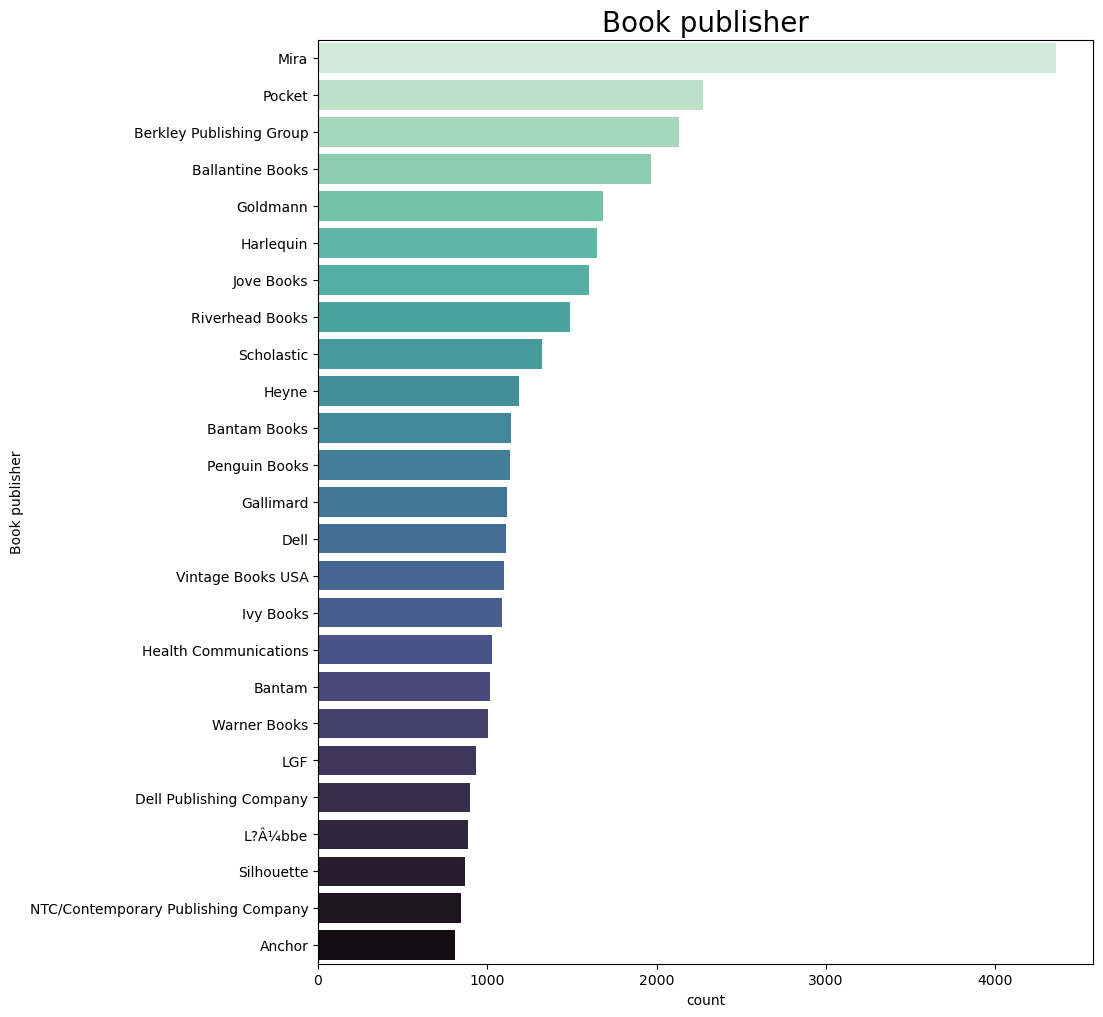

In [60]:
barplot(df,'publisher','Book publisher')

Explicit ratings에 대해서만 봤을 때,
가장 많은 사용자에게 Rating된 Top 5 책
Top 5 books which are rated by most number of users. 

In [81]:
rating_count = pd.DataFrame(ratings_explicit.groupby('isbn')['rating'].count())
rating_count.sort_values('rating', ascending=False).head()

,rating
isbn,
043935806X,248
059035342X,248
044021145X,190
067976402X,156
044023722X,144


In [99]:
most_rated_books = pd.DataFrame(['043935806X', '059035342X', '044021145X', '067976402X', '044023722X'], index=np.arange(5), columns = ['isbn'])
most_rated_books_summary = pd.merge(most_rated_books, items, on='isbn')
most_rated_books_summary.drop_duplicates()

,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
2,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
4,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group,http://images.amazon.com/images/P/044021145X.0...,http://images.amazon.com/images/P/044021145X.0...,http://images.amazon.com/images/P/044021145X.0...
6,067976402X,Snow Falling on Cedars,David Guterson,1995,Vintage Books USA,http://images.amazon.com/images/P/067976402X.0...,http://images.amazon.com/images/P/067976402X.0...,http://images.amazon.com/images/P/067976402X.0...
8,044023722X,A Painted House,John Grisham,2001,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...,http://images.amazon.com/images/P/044023722X.0...


가장 많은 평점수를 받은 책은 J.K.Rowling의  Harry Potter이다 .
And there is something in common among these five books that received the most rating counts — they are all novels.
Top 5 모두 소설이라는 공통점 
So it is conclusive that novels are popular and likely receive more ratings.

In [101]:
# Create column Rating average 
ratings_explicit['Avg_Rating']=ratings_explicit.groupby('isbn')['rating'].transform('mean')
# Create column Rating sum
ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('isbn')['rating'].transform('count')

/var/folders/wt/y14cmpv94wx58gfyv_67fxn40000gn/T/ipykernel_44394/4141279746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit['Avg_Rating']=ratings_explicit.groupby('isbn')['rating'].transform('mean')
/var/folders/wt/y14cmpv94wx58gfyv_67fxn40000gn/T/ipykernel_44394/4141279746.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('isbn')['rating'].transform('count')


In [102]:
ratings_explicit.head()

,user_id,age,isbn,rating,book_title,book_author,year_of_publication,publisher,city,state,country,Avg_Rating,Total_No_Of_Users_Rated
0,183,27.0,8401422825,9,Fahrenheit 451,Ray Bradbury,1993,"Plaza &amp Janes Editores, S.A.",porto,porto,portugal,9.0,1
3,49144,43.0,8433920081,5,El Almuerzo Desnudo,William S. Burroughs,1995,Anagrama,ferreries,illes balears,spain,6.0,2
4,240440,30.0,8433920081,7,El Almuerzo Desnudo,William S. Burroughs,1995,Anagrama,barcelona,catalunya,spain,6.0,2
5,183,27.0,8440630794,7,Cuentos del Planeta Tierra,Arthur C. Clarke,1993,Ediciones B,porto,porto,portugal,7.0,2
6,80908,30.0,8440630794,7,Cuentos del Planeta Tierra,Arthur C. Clarke,1993,Ediciones B,lleida,catalunya,spain,7.0,2
